# Pima Indians Diabetes Dataset

# 1. Problem Definition

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Specifically:

**Input:**

* Pregnancies (number of times pregnant)
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPedigreeFunction
* Age

**Output/Target** (2 Classes) - A Binary Classification:
* 0 (patients without diabetes)
* 1 (patients with diabetes)

# 2. Data Acquisition

In [3]:
# Essential libraries that will be used throughout this project

# System utilities
import os

# Kaggle resources
import kagglehub

# Data handling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model training
from sklearn.linear_model import LogisticRegression

# Train/Test Splitting
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For class imbalance
from imblearn.over_sampling import SMOTE

In [4]:
# Importing the latest version of the dataset from Kaggle, and printing out the directory
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print('Path to dataset files', path)
print(os.listdir(path))

# Loading the dataset into pandas
df = pd.read_csv(os.path.join(path, 'diabetes.csv'))
display(df)

Path to dataset files C:\Users\HP\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1
['diabetes.csv']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 3. Data Cleaning & Preprocessing

In [5]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Remarks:** There are no missing values with each variable having 768 non-null values.

In [6]:
# Descriptive summary statistics for numerical values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Feature/Target Split
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Preview targets
print(y.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [8]:
# Using StandardScaler to scale the features to ensure efficicent training of machine learning model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
display(X_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


# 4. Exploratory Data Analysis

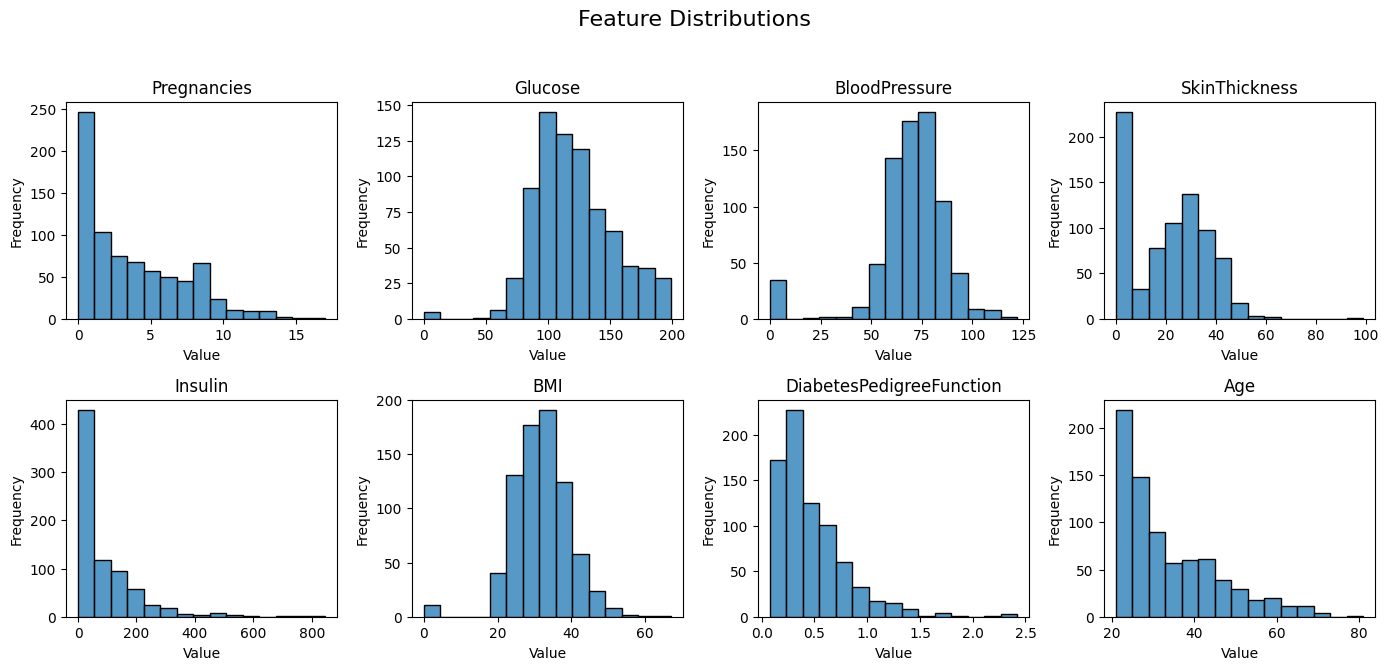

In [9]:
# Univariate Feature Distribution Histogram Plot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14,10))
fig.suptitle('Feature Distributions', fontsize=16, y=0.92)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature histogram
for i, col in enumerate(X.columns):
    sns.histplot(X[col], bins=15, edgecolor='black', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to make room for suptitle
plt.show()

**Remarks:**
* Normal Distribution: *Glucose, BloodPressure, BMI*
* Exponential-like Distribution: *Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, Age*

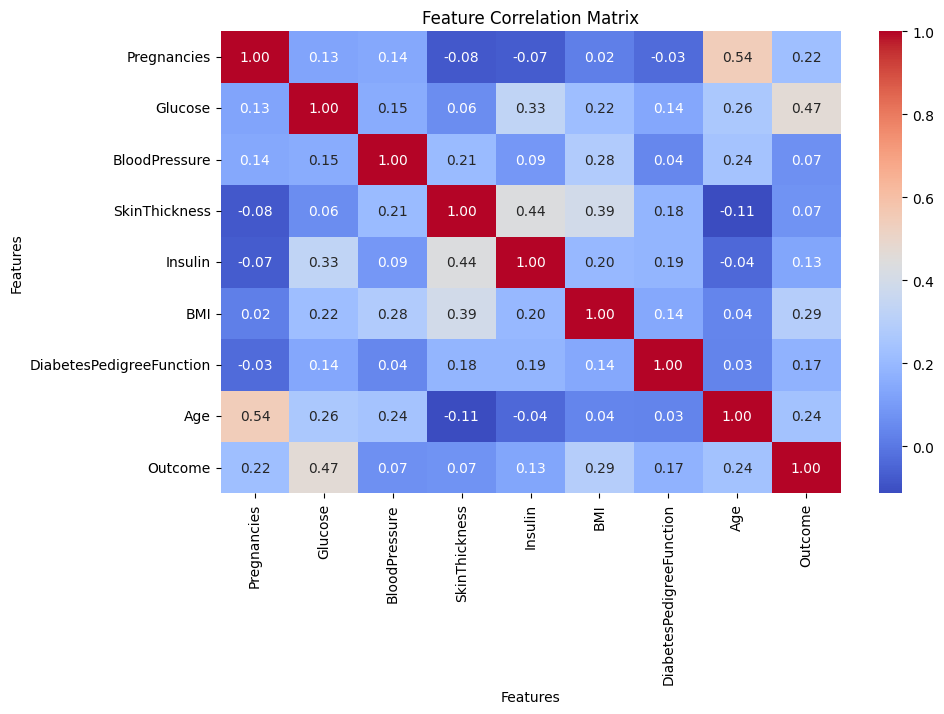

In [10]:
# Correlation matrix to visually represent the relationship between features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

**Remarks:** Overall, there are no variables that exhibit strong correlations with each other. The highest inter-variable correlation is observed between *Age* and *Pregnancies*. Regarding correlation with the target variable (*Outcome*), *Glucose* shows the strongest relationship, with a correlation coefficient of 0.47.

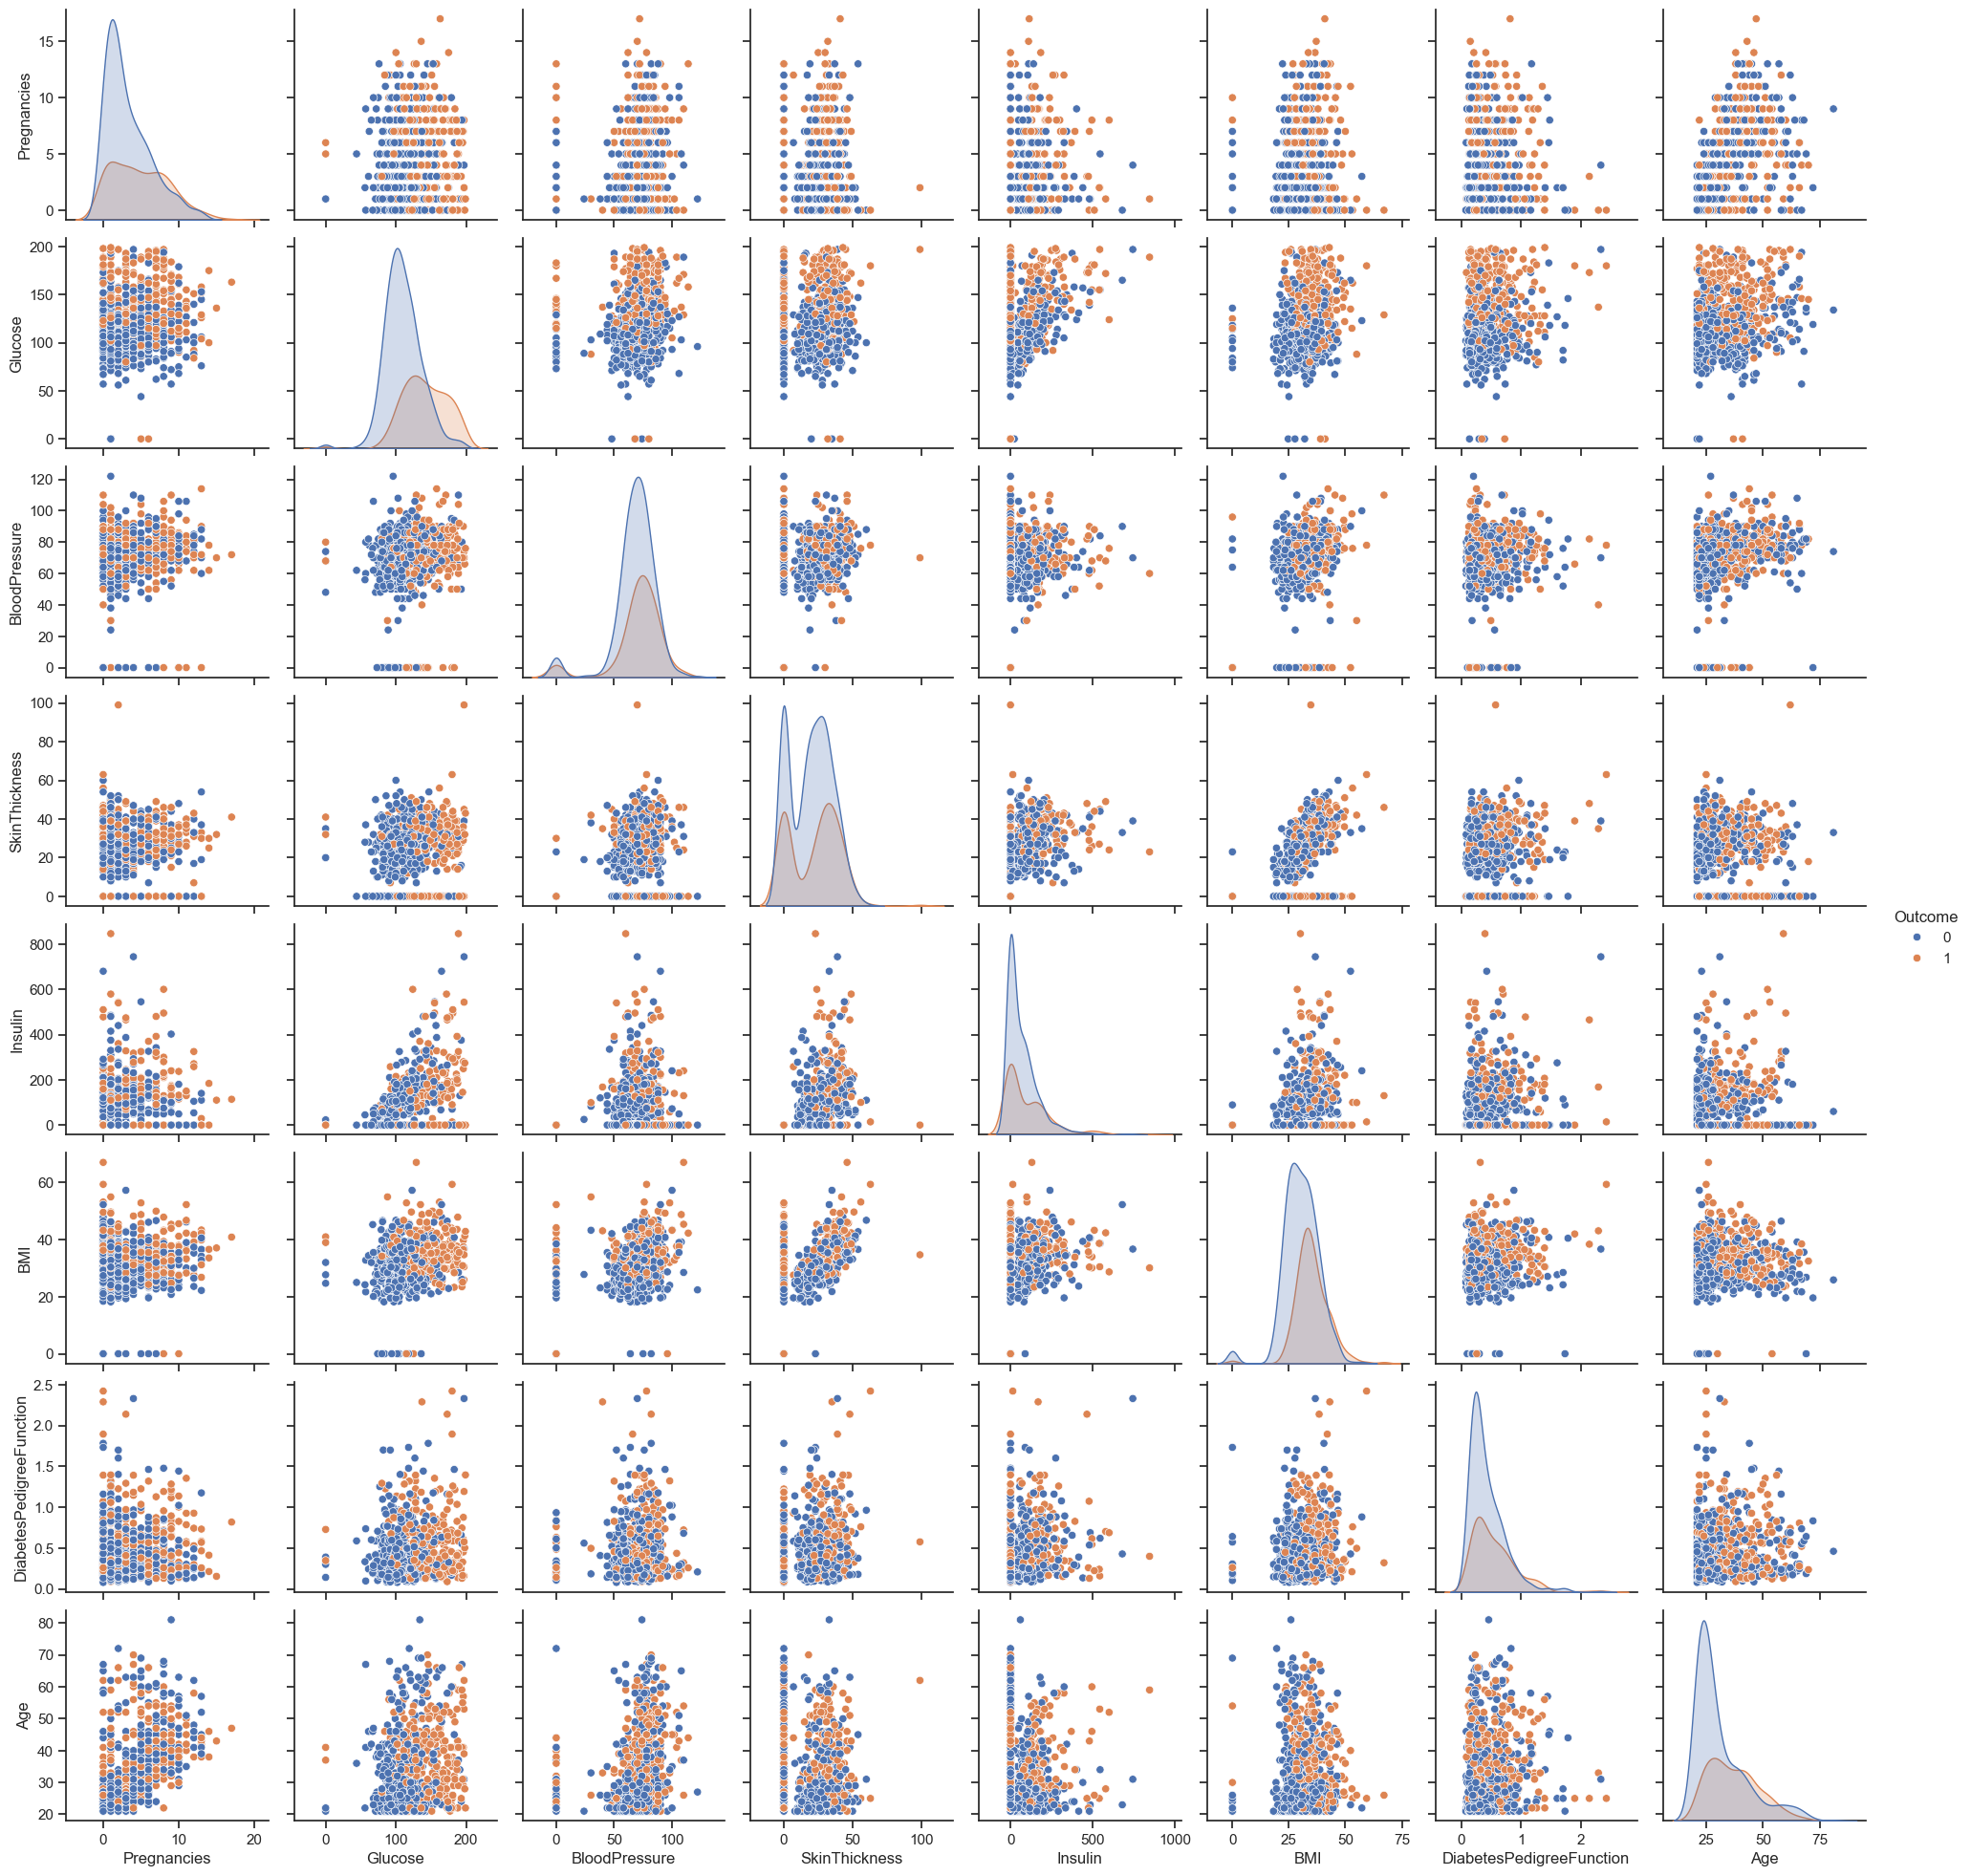

In [11]:
# Multivariate Scatter Plot
sns.set(style='ticks')
sns.pairplot(df, hue='Outcome')

**Remarks:** The scatter plot matrix does not reveal any strong or clear relationships between the features and the outcome variable.

# 5. Train-Test Split

In [12]:
# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirm split sizes and class balance
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

print('\nTraining target distribution:')
print(y_train.value_counts())

print('\nTesting target distribution:')
print(y_test.value_counts())

Training set size: 614
Testing set size: 154

Training target distribution:
Outcome
0    401
1    213
Name: count, dtype: int64

Testing target distribution:
Outcome
0    99
1    55
Name: count, dtype: int64


# 6. Model Training

In [13]:
# Train a Logistic Regression model with the training dataset
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# 7. Model Testing

In [14]:
# Apply the trained model on the testing dataset
y_pred = model.predict(X_test)

# 8. Model Evaluation

Model Test Accuracy: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Text(42.25, 0.5, 'True Label')

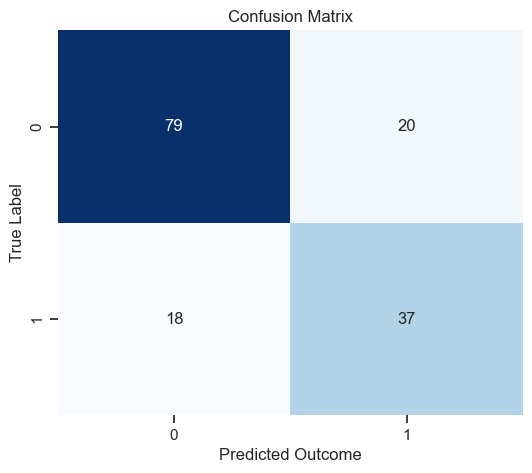

In [15]:
# Accuracy Score
print('Model Test Accuracy:', accuracy_score(y_test, y_pred))

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Outcome')
plt.ylabel('True Label')

**Remarks:** The Logistic Regression model performed reasonably well, achieving an accuracy of 75.3%, along with relatively high precision and recall scores.

# 10. Conclusion

The analysis of the Pima Indians Diabetes dataset provided meaningful insights into the health indicators associated with diabetes. Using a Logistic Regression model, we achieved a baseline accuracy of approximately 75.3%, along with reasonable precision and recall scores. This suggests that the model was able to moderately distinguish between diabetic and non-diabetic cases.